# Trabalho de Analise Exploratória
Aluno: Luiz Felipe Antunes Oliveira

A Análise Exploratória é uma fase importante de uma tarefa de Ciência de Dados. É nesta fase que buscamos entender os dados com os seguintes objetivos:

- Identificar padrões iniciais
- Formular perguntas de pesquisa e hipóteses
- Identificar dados incompletos ou não confiáveis

Para atingir os objetivos, em geral usa-se uma combinação de análises estatísticas com uma grande ênfase em geração e interpretação de gráficos.

## Leitura e análise inicial dos dados


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()


In [100]:
%matplotlib inline

df = pd.read_csv('C:/Users/Felipe Oliveira/Desktop/app002/Data_Cience/dataset/Video_Games_Sales_2016(LIMPO2).csv',
                      sep=',', encoding='utf-8')

In [101]:
df.drop(columns=['soma_total'], inplace=True)
df.head(50)

,NOME,PLATAFORMA,GENERO,VENDAS(AN),VENDAS(EU),VENDAS(JP),VENDAS(Outros),VENDAS(GLOBAL)
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,Platform,11.28,9.14,6.50,2.88,29.80
7,Wii Play,Wii,Misc,13.96,9.18,2.93,2.84,28.92
8,New Super Mario Bros. Wii,Wii,Platform,14.44,6.94,4.70,2.24,28.32
9,Duck Hunt,NES,Shooter,26.93,0.63,0.28,0.47,28.31


Vamos começar com perguntas iniciais:

Qual a média das vendas nas diferentes localides? Qual a máxima das vendas? Quantos valores únicos possuímos para as colunas(VENDAS_EU, VENDAS_NA, VENDAS_EU)?

In [158]:
# Media de vendas:
df["VENDAS_GLOBAL"].mean()
#df["VENDAS(EU)"].mean()
#df["VENDAS(AN)"].mean()
#df["VENDAS(JP)"].mean()
#df["VENDAS(Outros)"].mean()



0.5334617455285808

In [157]:
# Maximo de vendas maxima
df["VENDAS_GLOBAL"].max()

82.53

In [159]:
# Valores únicos para VENDAS GLOBAIS
len(df.groupby(["VENDAS_EU"]).size())

307

In [163]:
# Valores únicos para VENDAS AMERICANA NORTE
len(df.groupby(["VENDAS_AN"]).size())

402

#### Visualização da distribuição das variáveis

Existe alguma diferença na distribuição das vendas entre PLATAFORMA e jogos mais comprados?

<AxesSubplot:>

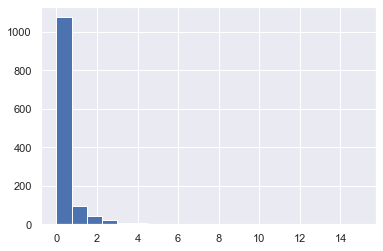

In [166]:
# Resposta para distribuição de plataforma X360
df_plat_x360 = df[df['PLATAFORMA'] == 'X360']
df_plat_x360["VENDAS_AN"].hist(bins=20)

<AxesSubplot:ylabel='Density'>

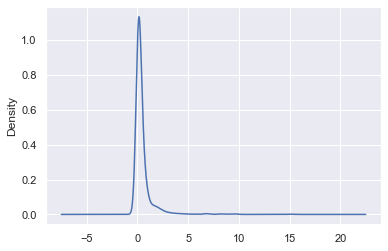

In [168]:
df_plat_x360["VENDAS_AN"].plot.kde()

<AxesSubplot:>

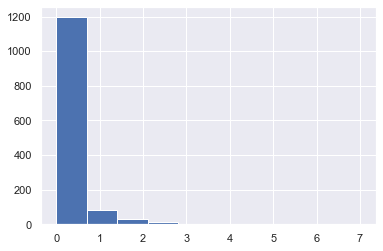

In [169]:
# Resposta para distribuição para PS3
df_plat_ps3 = df[df['PLATAFORMA'] == 'PS3']
df_plat_ps3["VENDAS_AN"].hist(bins=10)

<AxesSubplot:ylabel='Density'>

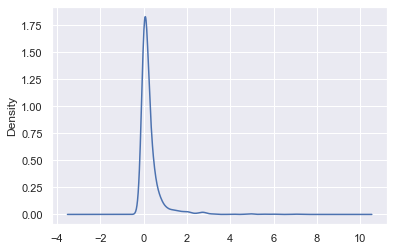

In [170]:
df_plat_ps3["VENDAS_AN"].plot.kde()

Utilizando o seaborn para uma melhor visualização

<AxesSubplot:xlabel='Count', ylabel='GENERO'>

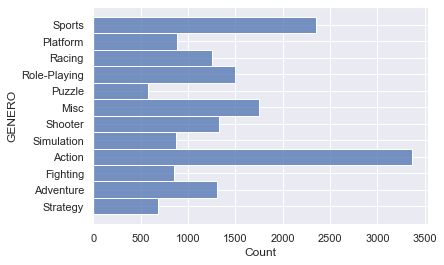

In [213]:
#sns.histplot(data=df, y="GENERO")
#sns.histplot(data=df, y="GENERO", kde=True)
sns.histplot(data=df, y="GENERO")



<AxesSubplot:xlabel='Count', ylabel='GENERO'>

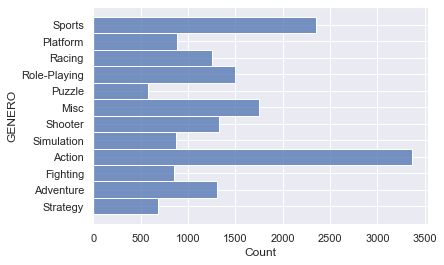

In [212]:
sns.histplot(data=df, y="GENERO", multiple="dodge", bins=25)

BoxPlot das vendas globais de acordo com o GENERO do jogo para ver se as diferenças ficam mais óbvias.

<AxesSubplot:xlabel='VENDAS_GLOBAL', ylabel='GENERO'>

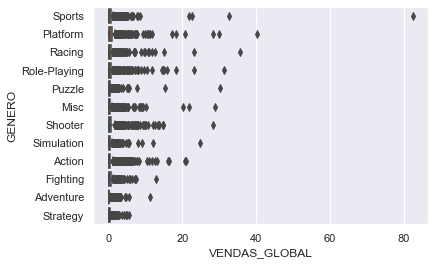

In [177]:
sns.boxplot(data=df, x="VENDAS_GLOBAL", y="GENERO")

### Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de relamação (assuntos) mais comuns.

Fazemos uma contagem dos assuntos mais comuns (usando groupby) e criamos uma lista contendo os assuntos com mais de 60 reclamações. Utilizaremos a lista para uso posterior.

In [215]:
df_grouped_top = df.groupby(['GENERO']).size().reset_index(name='COUNT')
df_grouped_top = df_grouped_top[df_grouped_top['COUNT'] > 60]
list_grouped = list(df_grouped_top['GENERO'])
list_grouped

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

Criando um novo DataFrame contendo apenas reclamações contidas na lista das reclamações mais comuns.

In [217]:
df_plat = df[df['GENERO'].isin(list_grouped)]
df_plat

,NOME,PLATAFORMA,GENERO,VENDAS_AN,VENDAS_EU,VENDAS_JP,VENDAS_OUTROS,VENDAS_GLOBAL
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...
16712,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,0.01
16713,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,0.01
16714,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,0.01
16715,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,0.01


### Análise de similaridades entre reclamações de bairros

Queremos agora identificar bairros com problemas similares. Com o método crosstab() podemos gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas.

In [218]:
df_cross = pd.crosstab(df_plat.VENDAS_EU, df_plat.GENERO)
df_cross.head(20)

GENERO,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
VENDAS_EU,,,,,,,,,,,,
0.00,916,805,308,796,162,279,229,720,234,368,785,271
0.01,322,88,63,124,86,68,138,104,130,78,212,81
0.02,300,76,59,108,66,49,114,96,116,67,184,73
0.03,234,38,46,73,64,22,90,58,77,49,115,60
0.04,152,38,38,62,43,18,70,50,73,40,89,36
0.05,101,40,20,53,38,19,53,45,47,25,106,17
0.06,79,28,20,45,35,9,41,29,36,17,61,11
0.07,80,15,22,33,27,9,31,31,32,17,46,12
0.08,58,17,19,28,27,5,29,26,22,16,52,8


Usando o DataFrame obtido anteriormente vamos gerar a matriz de correlações entre escolas

In [219]:
df_corr = df_cross.corr()
df_corr

GENERO,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
GENERO,,,,,,,,,,,,
Action,1.000000,0.926723,0.978849,0.956872,0.970291,0.964949,0.966901,0.951406,0.972456,0.974453,0.988381,0.990843
Adventure,0.926723,1.000000,0.979519,0.994976,0.829985,0.987558,0.810020,0.996674,0.827268,0.985826,0.967164,0.956825
Fighting,0.978849,0.979519,1.000000,0.992463,0.916536,0.990287,0.903963,0.991100,0.915601,0.996623,0.993660,0.988622
Misc,0.956872,0.994976,0.992463,1.000000,0.876914,0.994027,0.859037,0.998873,0.873832,0.995362,0.985319,0.976075
Platform,0.970291,0.829985,0.916536,0.876914,1.000000,0.888597,0.990882,0.867395,0.986820,0.905632,0.939105,0.939058
Puzzle,0.964949,0.987558,0.990287,0.994027,0.888597,1.000000,0.878340,0.993571,0.892137,0.995730,0.988764,0.984462
Racing,0.966901,0.810020,0.903963,0.859037,0.990882,0.878340,1.000000,0.849920,0.994733,0.893031,0.929230,0.933974
Role-Playing,0.951406,0.996674,0.991100,0.998873,0.867395,0.993571,0.849920,1.000000,0.865086,0.994420,0.982557,0.973277
Shooter,0.972456,0.827268,0.915601,0.873832,0.986820,0.892137,0.994733,0.865086,1.000000,0.905663,0.938387,0.942244


In [184]:
df_corr = df_corr.style.background_gradient(cmap="RdBu")
df_corr

GENERO,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
GENERO,,,,,,,,,,,,
Action,1.000000,0.926723,0.978849,0.956872,0.970291,0.964949,0.966901,0.951406,0.972456,0.974453,0.988381,0.990843
Adventure,0.926723,1.000000,0.979519,0.994976,0.829985,0.987558,0.810020,0.996674,0.827268,0.985826,0.967164,0.956825
Fighting,0.978849,0.979519,1.000000,0.992463,0.916536,0.990287,0.903963,0.991100,0.915601,0.996623,0.993660,0.988622
Misc,0.956872,0.994976,0.992463,1.000000,0.876914,0.994027,0.859037,0.998873,0.873832,0.995362,0.985319,0.976075
Platform,0.970291,0.829985,0.916536,0.876914,1.000000,0.888597,0.990882,0.867395,0.986820,0.905632,0.939105,0.939058
Puzzle,0.964949,0.987558,0.990287,0.994027,0.888597,1.000000,0.878340,0.993571,0.892137,0.995730,0.988764,0.984462
Racing,0.966901,0.810020,0.903963,0.859037,0.990882,0.878340,1.000000,0.849920,0.994733,0.893031,0.929230,0.933974
Role-Playing,0.951406,0.996674,0.991100,0.998873,0.867395,0.993571,0.849920,1.000000,0.865086,0.994420,0.982557,0.973277
Shooter,0.972456,0.827268,0.915601,0.873832,0.986820,0.892137,0.994733,0.865086,1.000000,0.905663,0.938387,0.942244


In [224]:
df_plat = pd.DataFrame(df_cross.sum(), columns=['COUNT'])
df_plat

,COUNT
GENERO,
Action,3370
Adventure,1303
Fighting,849
Misc,1750
Platform,888
Puzzle,580
Racing,1249
Role-Playing,1500
Shooter,1323


<AxesSubplot:xlabel='COUNT', ylabel='GENERO'>

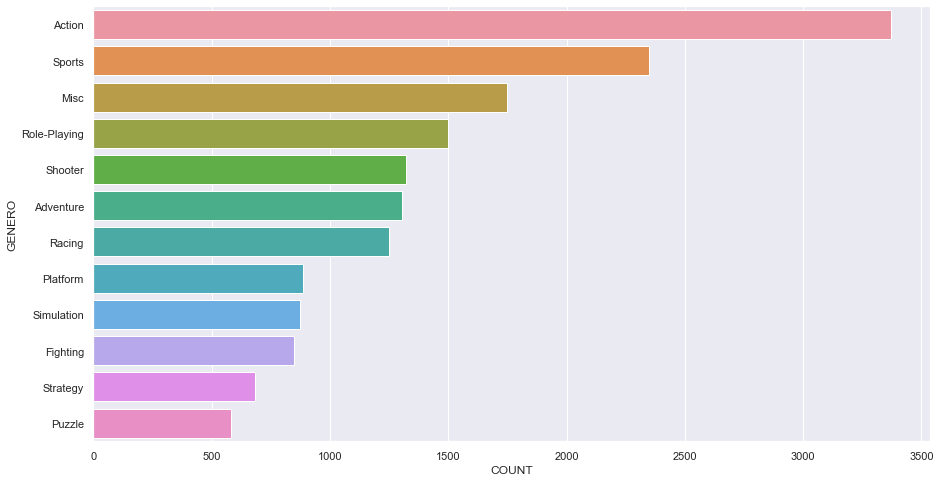

In [223]:
dfgraph = df.groupby(['GENERO']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="GENERO", orient="h")